## Use sentence embedding to cluster text

1. Dataset used : ag-news https://huggingface.co/datasets/ag_news

### Install libraries

In [2]:
!pip install -q datasets sentence-transformers umap-learn plotly seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.manifold import TSNE
from datasets import load_dataset

from sentence_transformers import SentenceTransformer
%matplotlib inline

In [4]:
# Load a model. List available here : https://huggingface.co/sentence-transformers?sort_models=downloads#models
emb_model = SentenceTransformer("sentence-t5-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/219M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/115 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

rust_model.ot:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

### Get data

In [5]:
dataset = load_dataset("ag_news")

# The dataset has 120K records. Keep a only subset.
N = 2000
train_set = dataset["train"].to_pandas()[:N]
X_train_text = train_set["text"]
y_train_labels = train_set["label"]

print(train_set.shape, len(X_train_text), len(y_train_labels))
train_set.head()


README.md:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

(2000, 2) 2000 2000


text  label
0  Wall St. Bears Claw Back Into the Black (Reute...      2
1  Carlyle Looks Toward Commercial Aerospace (Reu...      2
2  Oil and Economy Cloud Stocks' Outlook (Reuters...      2
3  Iraq Halts Oil Exports from Main Southern Pipe...      2
4  Oil prices soar to all-time record, posing new...      2

<Axes: xlabel='label', ylabel='Count'>

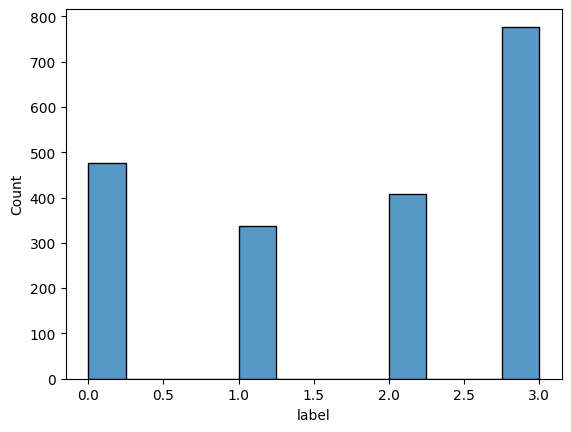

In [6]:
sns.histplot(y_train_labels)

### Convert Text to embeddings. It would convert each text to 768 dimmensional vector.

> Note: The X is now a matrix of (N,D) shape. where N=Number of records, D=Embedding Dim

In [7]:
X = emb_model.encode(X_train_text)
print(X.shape)

(2000, 768)


### Try tSNE toplot them in 2D
  
> We can't plot the high dimmensional vectors. So let's reduce the dim using tSNE alorithms

In [8]:
tsne = TSNE(n_components=2, verbose=1, random_state=42, n_iter=500)
x_tsne_2d = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.002s...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed neighbors for 2000 samples in 0.403s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.194367
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.913864
[t-SNE] KL divergence after 500 iterations: 1.319936


### Now plot using plotly.
> ovserve that simillar setnces (color coded by label) are clustered together, which sows teh capability odf teh sentence encoder in pereserving teh semantic simmilarity.

In [9]:
df = pd.DataFrame(
    {
        "x": x_tsne_2d[:, 0],
        "y": x_tsne_2d[:, 1],
        "text": X_train_text,
        "label": y_train_labels,
    }
)

px.scatter(df, x="x", y="y", color="label", hover_data=["text", "label"] )

### Check the correclation matrix by plotting it as a heatmap

Text(0.5, 1.0, 'Semantic Textual Similarity')

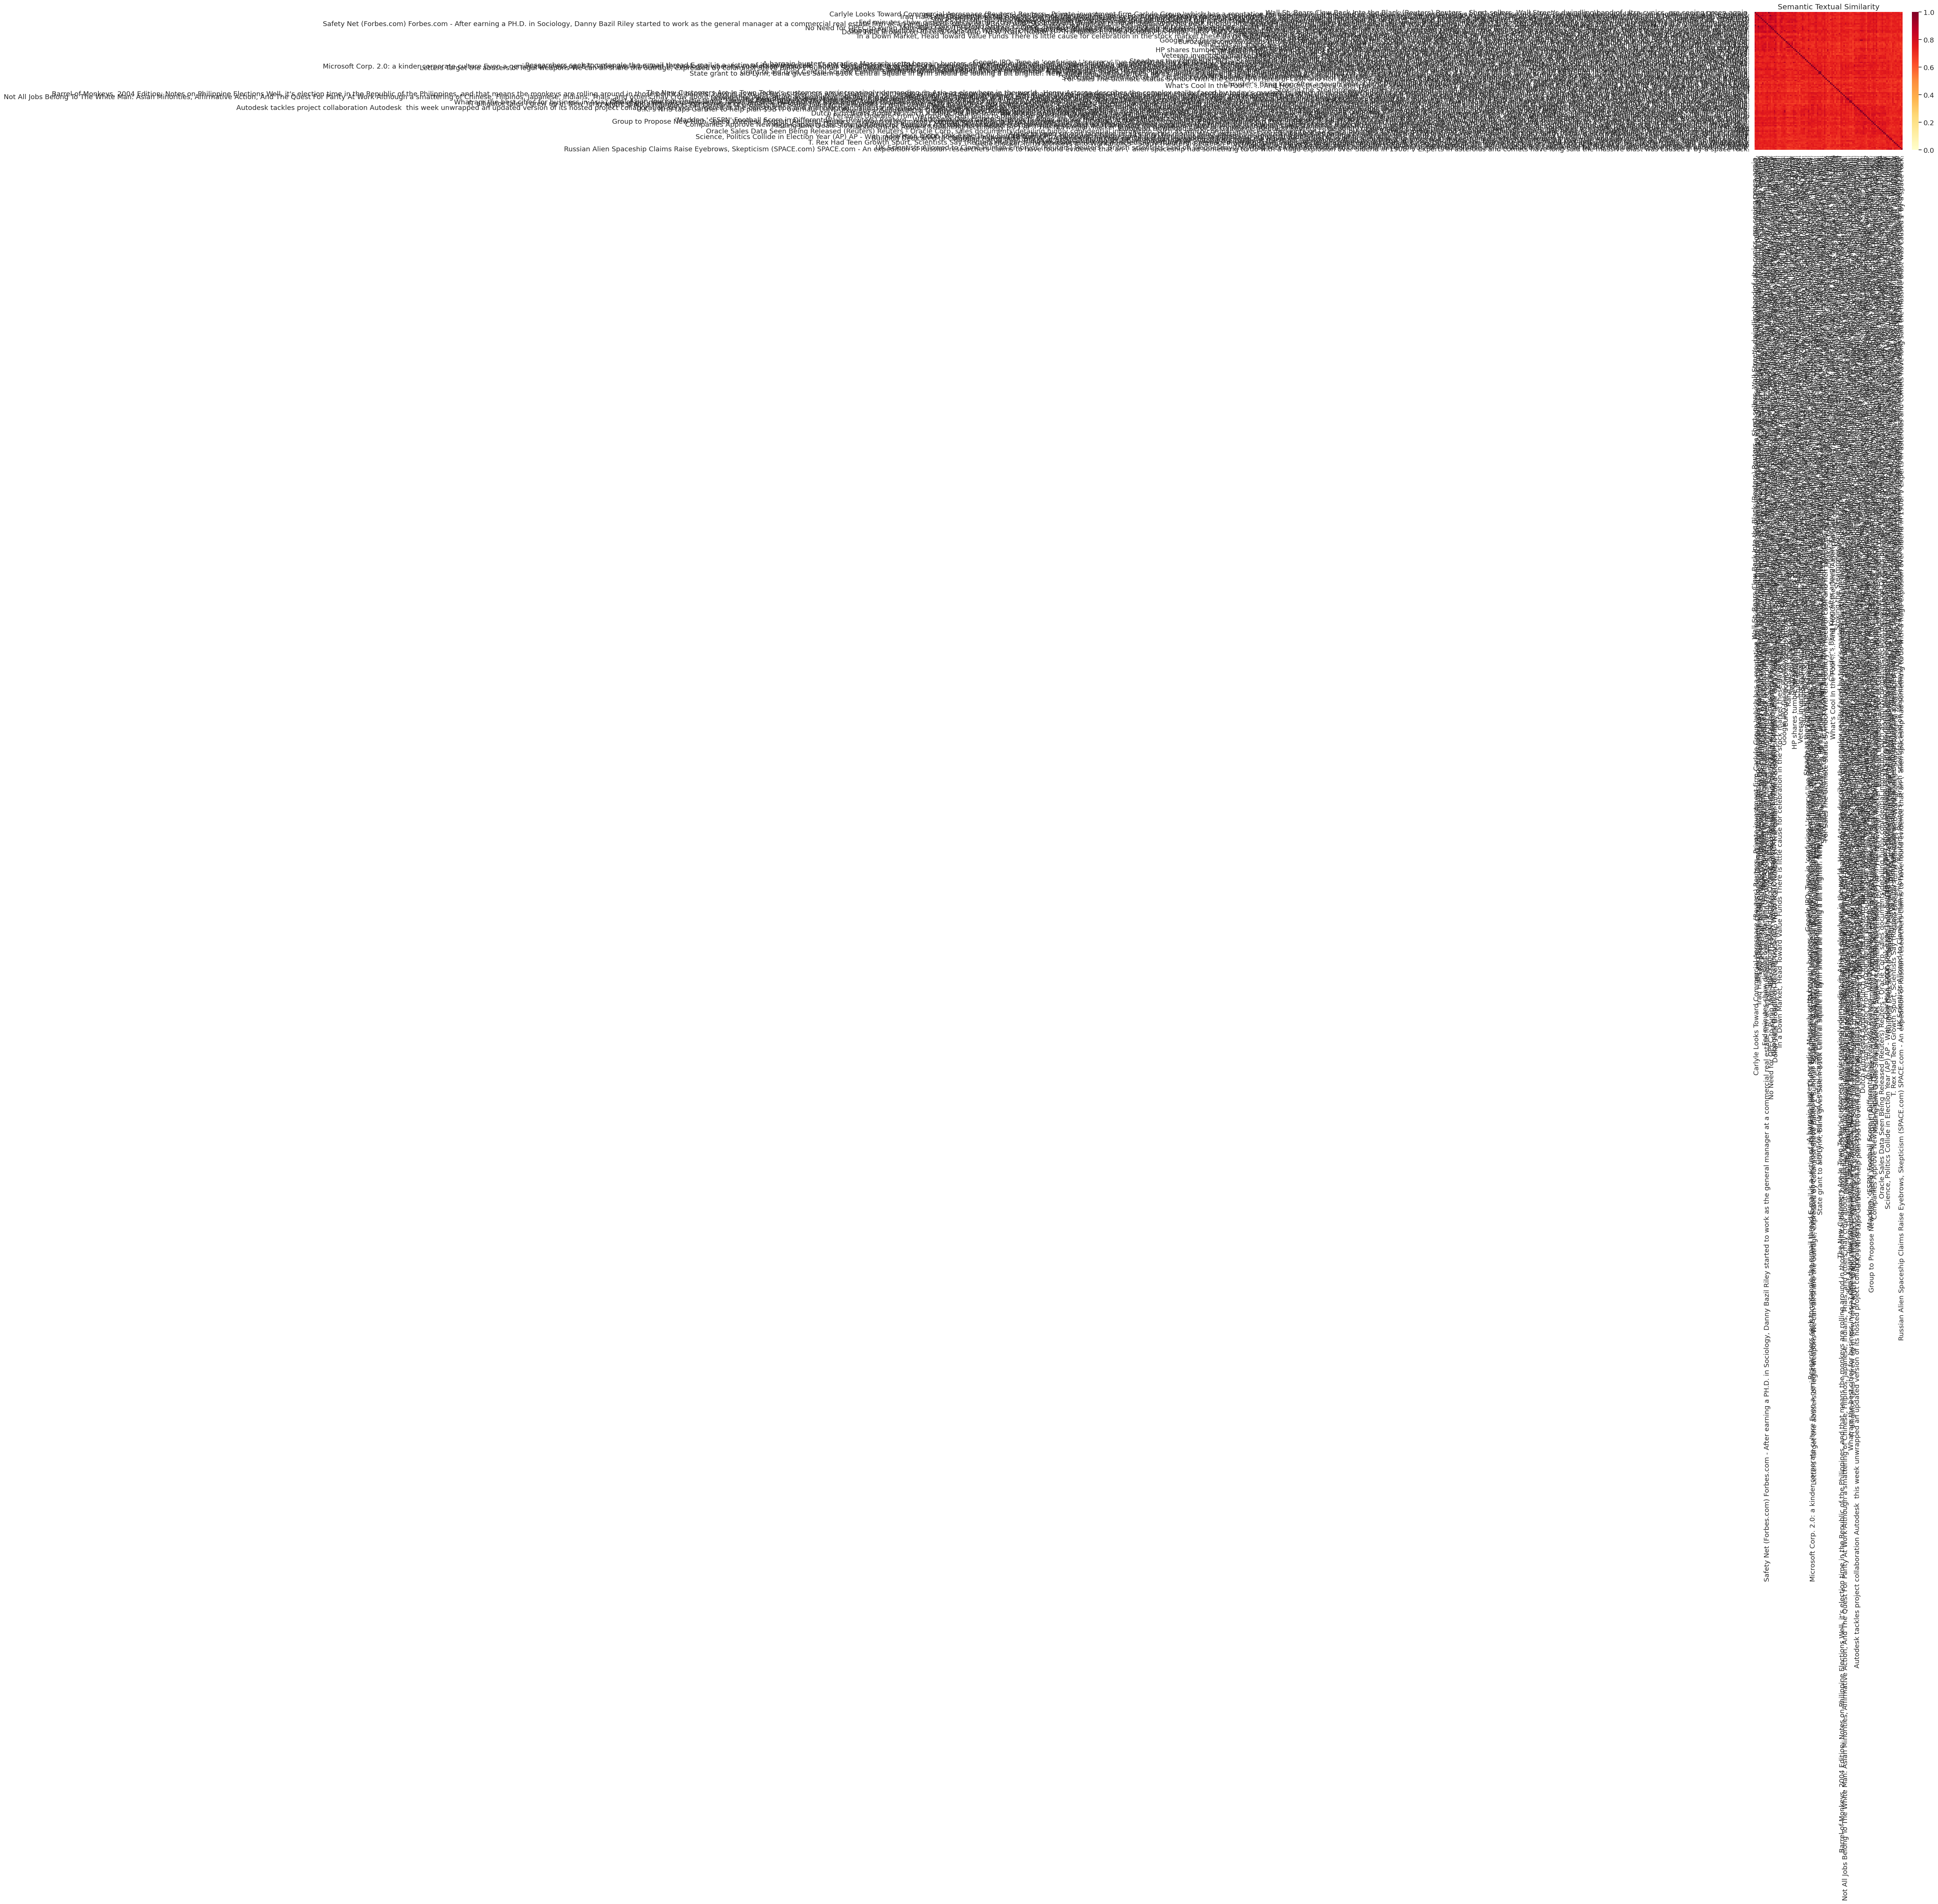

In [10]:
M = 100
X_sub = X[:M]
corr = np.inner(X_sub, X_sub)
sns.set(font_scale=1.2)
g = sns.heatmap(corr,
    xticklabels=X_train_text[:M],
    yticklabels=X_train_text[:M],
    vmin=0,
    vmax=1,
    cmap="YlOrRd")
g.set_xticklabels(X_train_text[:M], rotation=90)
g.set_title("Semantic Textual Similarity")